# Data Science Coursera Capstone

#### The notebook is for Data Science Capstone project. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction/Business Problem 

Traffic collisions continue to be a serious problem. Roads safety is pressing concern for many countries, where road crash fatalities and disabilities is gradually being recognized as a major public health concern. According to World Health Organization (WHO); nearly 1.25 million people die in road crashes each year, on average 3,287 deaths a day. In addition, road traffic crashes rank as the 9th leading cause of death and account for 2.2% of all deaths globally.

Collisions are financial burden on government and society. Prediction of severity of collision helps local transport authority and emergency responders to manage traffic and avoid loss of life and property.

This project uses collision data of Seattle, WA. The aim of this project is to use data science methodology and machine learning to gain an understanding of the problem and predict the severity of collision and develop prevention mechanisms the same.

The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.

# Data

In this phase we will explore the data and clean it for our analysis and model

### Data Source

The data was provided by Coursera but sourced from the Seattle Police Department, and it contains information about traffic collisions in the Seattle Area from 2004 to Present. 

The attributes that is available in this data and are relevant to this project include:

- Severity code - a measure of have severe the crash was
- Person count - how many people were involved in the crash
- Vehicle count - how many cars were involved in the crash
- Junction type - whether or not the accident occurred at a junction and what type it is
- Weather - what the weather was at the time of the crash
- Road condition - whether the road was wet, or something was on it, etc.
- Light condition - whether it was dark, or if there were streetlights present, etc.

In [4]:
# Import all Python libraries that we will need for this project

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import folium
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
#functions used later in the code
def show_summary(df):

    col_name = round(100*(df.isna().sum()/len(df)), 2)
    col_nuniq = df.nunique()    
    df_summary = pd.DataFrame({"data_type": df.dtypes,
                           "percent_missing_values": col_name,
                           "total_unique_values": col_nuniq}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
    return df_summary

def plotbyInt_values(df):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphPerRow=3
    nGraphRow = round(nCol / nGraphPerRow)
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow,figsize=(24,24))
    for variable, subplot in zip(columnNames, ax.flatten()):
        #print(df[variable])
        if (variable!=''):
            _= df.pivot_table(index=variable,columns=columnNames[0], aggfunc='size').plot.bar(stacked=True, ax=subplot)
            for label in subplot.get_xticklabels():
                label.set_rotation(90)
                
def plotbycharvalues(colname):
    for i in range (0,len(colname)):
        bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7)
        g = sns.FacetGrid(df, col=colname[i], hue="SEVERITYCODE", palette="Set1", col_wrap=4)
        g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
        g.axes[-1].legend()
        plt.show()

In [6]:
# Import data into Pandas data frame
df = pd.read_csv('Data-Collisions.csv')

# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

## Basic Insight of Dataset

In [7]:
# Check total records and columns
df.shape

(194673, 38)

#### We have 194673 records with 38 attributes

In [8]:
# Check data types
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [9]:
# Columns
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [10]:
# Statistical summary of each attribute
df.describe(include = "all")

SEVERITYCODE              X              Y       OBJECTID  \
count   194673.000000  189339.000000  189339.000000  194673.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         1.298901    -122.330518      47.619543  108479.364930   
std          0.457778       0.029976       0.056157   62649.722558   
min          1.000000    -122.419091      47.495573       1.000000   
25%          1.000000    -122.348673      47.575956   54267.000000   
50%          1.000000    -122.330224      47.615369  106912.000000   
75%          2.000000    -122.311937      47.663664  162272.000000   
max          2.000000    -122.238949      47.734142  219547.000000   

               INCKEY      COLDETKEY REPORTNO   STATUS ADDRTYPE  \
count   194673.000000  194673.000000   194673   194673   192747   
unique            NaN            NaN   194670        2        3   
top               NaN            NaN  1780512  Matched    Block   
freq              NaN            NaN        2   189786   126926   
mean    141091.456350  141298.811381      NaN      NaN      NaN   
std      86634.402737   86986.542110      NaN      NaN      NaN   
min       1001.000000    1001.000000      NaN      NaN      NaN   
25%      70383.000000   70383.000000      NaN      NaN      NaN   
50%     123363.000000  123363.000000      NaN      NaN      NaN   
75%     203319.000000  203459.000000      NaN      NaN      NaN   
max     331454.000000  332954.000000      NaN      NaN      NaN   

               INTKEY  ... ROADCOND LIGHTCOND PEDROWNOTGRNT    SDOTCOLNUM  \
count    65070.000000  ...   189661    189503          4667  1.149360e+05   
unique            NaN  ...        9         9             1           NaN   
top               NaN  ...      Dry  Daylight             Y           NaN   
freq              NaN  ...   124510    116137          4667           NaN   
mean     37558.450576  ...      NaN       NaN           NaN  7.972521e+06   
std      51745.990273  ...      NaN       NaN           NaN  2.553533e+06   
min      23807.000000  ...      NaN       NaN           NaN  1.007024e+06   
25%      28667.000000  ...      NaN       NaN           NaN  6.040015e+06   
50%      29973.000000  ...      NaN       NaN           NaN  8.023022e+06   
75%      33973.000000  ...      NaN       NaN           NaN  1.015501e+07   
max     757580.000000  ...      NaN       NaN           NaN  1.307202e+07   

       SPEEDING ST_COLCODE              ST_COLDESC     SEGLANEKEY  \
count      9333     194655                  189769  194673.000000   
unique        1        115                      62            NaN   
top           Y         32  One parked--one moving            NaN   
freq       9333      27612                   44421            NaN   
mean        NaN        NaN                     NaN     269.401114   
std         NaN        NaN                     NaN    3315.776055   
min         NaN        NaN                     NaN       0.000000   
25%         NaN        NaN                     NaN       0.000000   
50%         NaN        NaN                     NaN       0.000000   
75%         NaN        NaN                     NaN       0.000000   
max         NaN        NaN                     NaN  525241.000000   

        CROSSWALKKEY  HITPARKEDCAR  
count   1.946730e+05        194673  
unique           NaN             2  
top              NaN             N  
freq             NaN        187457  
mean    9.782452e+03           NaN  
std     7.226926e+04           NaN  
min     0.000000e+00           NaN  
25%     0.000000e+00           NaN  
50%     0.000000e+00           NaN  
75%     0.000000e+00           NaN  
max     5.239700e+06           NaN  

[11 rows x 38 columns]

#### We can now see how many unique values, which is the top value and the frequency of top value in the object-typed columns. Some values in the table above show as "NaN", this is because those numbers are not available regarding a particular column type.

#### Many of the columns either hold a key or code, these colummns can be removed from the dataframe. For columns which are not defined in metadata will also be dropped. STATUS and SEVERITYCODE.1 are not present in metadata. I am not deleting OBJECTID as it is a unique key and can be helpful in plotting. 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'

In [11]:
df.drop(['INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1','SEVERITYDESC'
,'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'],axis=1,inplace=True)

In [12]:
# Dataset summary
show_summary(df)

data_type  percent_missing_values  total_unique_values
PEDROWNOTGRNT     object                   97.60                    1
SPEEDING          object                   95.21                    1
INATTENTIONIND    object                   84.69                    1
JUNCTIONTYPE      object                    3.25                    7
Y                float64                    2.74                23839
X                float64                    2.74                23563
LIGHTCOND         object                    2.66                    9
WEATHER           object                    2.61                   11
ROADCOND          object                    2.57                    9
COLLISIONTYPE     object                    2.52                   10
UNDERINFL         object                    2.51                    4
LOCATION          object                    1.38                24102
ADDRTYPE          object                    0.99                    3
ST_COLCODE        object                    0.01                  115
SEVERITYCODE       int64                    0.00                    2
INCDATE           object                    0.00                 5985
INCDTTM           object                    0.00               162058
VEHCOUNT           int64                    0.00                   13
PEDCYLCOUNT        int64                    0.00                    3
PEDCOUNT           int64                    0.00                    7
PERSONCOUNT        int64                    0.00                   47
OBJECTID           int64                    0.00               194673
HITPARKEDCAR      object                    0.00                    2

### Let's check for NULL or MISSING data on each column

In [13]:
# Let's check for NULL or MISSING data on each column
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
ADDRTYPE            1926
LOCATION            2677
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLCODE            18
HITPARKEDCAR           0
dtype: int64

### Let's see how the dataset is spanned across years

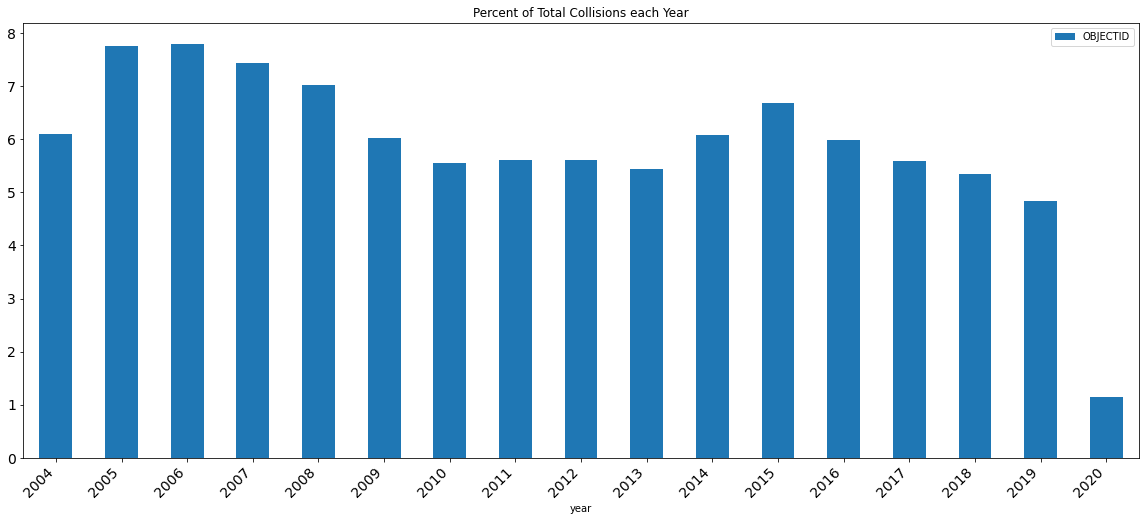

In [14]:
df["year"] = pd.DatetimeIndex(df.INCDATE).year 
df["month"] = pd.DatetimeIndex(df.INCDATE).month  
df["day"] = pd.DatetimeIndex(df.INCDATE).day  
df['dayofweek']= pd.DatetimeIndex(df.INCDATE).dayofweek
df['Hour'] = pd.DatetimeIndex(df.INCDTTM).hour.astype(int)
df_yr = round(100*(df[["year","OBJECTID"]].groupby(by=["year"]).count()/len(df)), 2)
# create a bar chart for visualization 
df_yr.plot(kind='bar', figsize=(20, 8));
plt.title("Percent of Total Collisions each Year");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.show();

#### Year 2020 has less data compared to other years, this will cause unnecessary noise in prediction. Let's remove reccords for 2020.

In [15]:
# let's remove reccords for 2020
df = df[df["year"] != 2020]
print(df.shape)

(192428, 28)


In [16]:
#As per meta data  INATTENTIONIND, UNDERINFL,PEDROWNOTGRNT, SPEEDING, HITPARKEDCAR are indicators, let's see what values they have
print("INATTENTIONIND", '\t', df['INATTENTIONIND'].value_counts().to_frame('count'))
print("UNDERINFL", '\t', df['UNDERINFL'].value_counts().to_frame('count'))
print("PEDROWNOTGRNT", '\t', df['PEDROWNOTGRNT'].value_counts().to_frame('count'))
print("SPEEDING", '\t', df['SPEEDING'].value_counts().to_frame('count'))
print("HITPARKEDCAR", '\t', df['HITPARKEDCAR'].value_counts().to_frame('count'))

INATTENTIONIND 	    count
Y  29805
UNDERINFL 	    count
N  99013
0  80394
Y   5126
1   3995
PEDROWNOTGRNT 	    count
Y   4631
SPEEDING 	    count
Y   9261
HITPARKEDCAR 	     count
N  185524
Y    6904


### Let's clean the identifiers based on the uniques values in it. We will replace Y with 1 and N with 0

In [17]:
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace('Y',1, inplace=True)
df[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")

In [18]:
df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N',0, inplace=True)
df["UNDERINFL"].replace('Y',1, inplace=True)
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")

In [19]:
df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace('Y',1, inplace=True)
df[["PEDROWNOTGRNT"]] = df[["PEDROWNOTGRNT"]].astype("int")

In [20]:
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace('Y',1, inplace=True)
df[["SPEEDING"]] = df[["SPEEDING"]].astype("int")

In [21]:
df["HITPARKEDCAR"].replace('N',0, inplace=True)
df["HITPARKEDCAR"].replace('Y',1, inplace=True)
df[["HITPARKEDCAR"]] = df[["HITPARKEDCAR"]].astype("int")

### Let's review the categorical data in dataset

In [22]:
# Light conditions. Let's replace other and null as Unknown
df["LIGHTCOND"].replace('Other','Unknown', inplace=True)
df["LIGHTCOND"].replace(np.nan, 'Unknown', inplace=True)
print("LIGHTCOND",df['LIGHTCOND'].value_counts().to_frame('count'))
df['LIGHTCOND'].isna().sum()

LIGHTCOND                            count
Daylight                  115407
Dark - Street Lights On    48104
Unknown                    17860
Dusk                        5862
Dawn                        2480
Dark - No Street Lights     1522
Dark - Street Lights Off    1193


0

In [23]:
# Let's classify the data
df["LIGHTCOND"].replace('Dusk','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dawn','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dark - No Street Lights','Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights On', 'Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights Off','Dark', inplace=True)

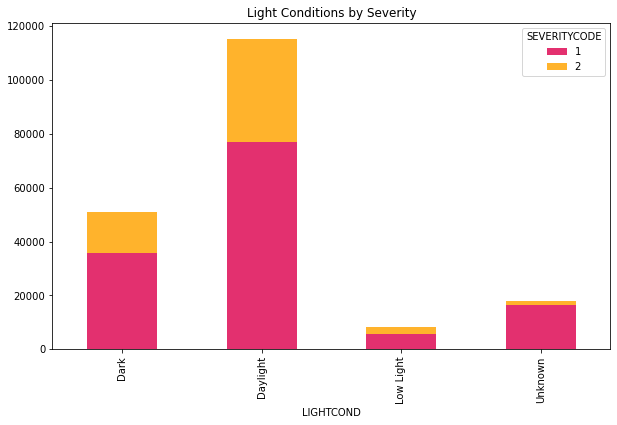

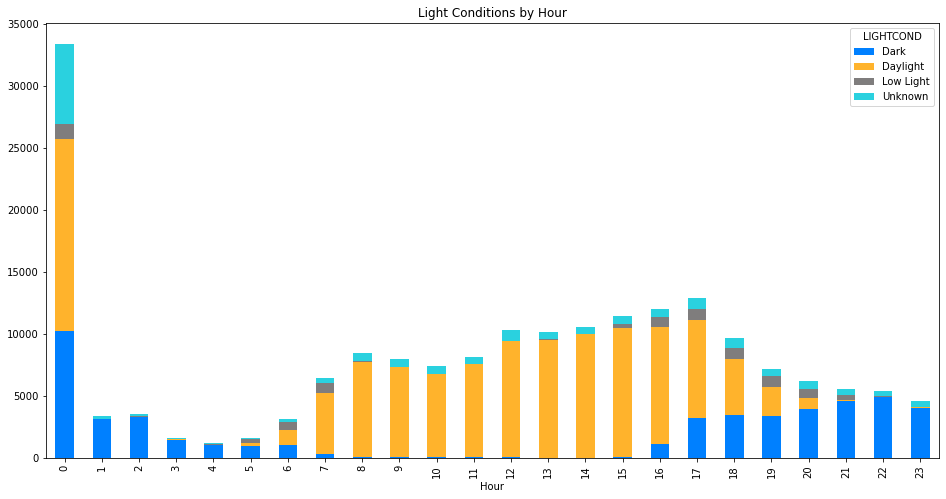

In [24]:
# Plot light condition by severity and hours in the day
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('#e3306f','#ffb32c'),figsize=(10, 6)   )
plt.title("Light Conditions by Severity");
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d','#2ad1df'),figsize=(16, 8)   )
plt.title("Light Conditions by Hour");

#### From the chart it is evident that, INTDDTM is not correct, we will remove data with hour as 0 and light condition not as dark. for other unknown values it is visible from graph that mostly it is daylight in Seatlle from 6 am to 6 pm.

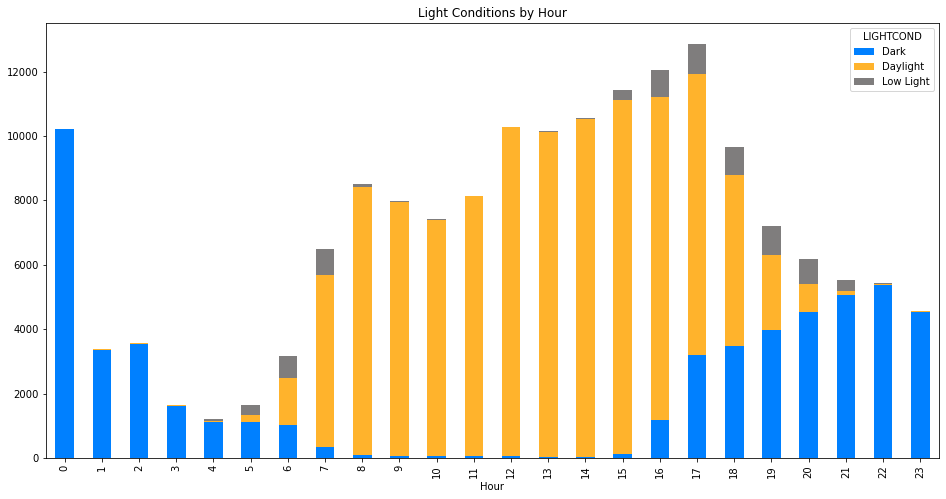

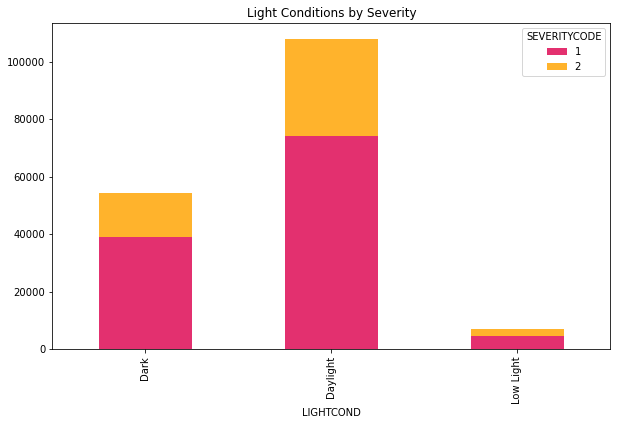

In [25]:
# Fill the missing values

df = df[((df["Hour"] == 0 )& (df["LIGHTCOND"]=='Dark')) | (df["Hour"] != 0)]
df.loc[df['Hour'].isin([0,1,2,3,4,5,19,20,21,22,23])&(df["LIGHTCOND"]=='Unknown'), 'LIGHTCOND'] = 'Dark'
df.loc[(df['Hour'] >= 6)&(df['Hour'] <= 18)&(df["LIGHTCOND"]=='Unknown') ,'LIGHTCOND'] = 'Daylight'
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d','#2ad1df') ,figsize=(16, 8)   )
plt.title("Light Conditions by Hour");
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('#e3306f','#ffb32c')  ,figsize=(10, 6)   )
plt.title("Light Conditions by Severity");

### Let's review weather

WEATHER                           count
Clear                     99299
Raining                   30161
Overcast                  24651
Unknown                   13649
Snowing                     806
Fog/Smog/Smoke              547
Sleet/Hail/Freezing Rain     99
Blowing Sand/Dirt            51
Severe Crosswind             25
Unknown 0


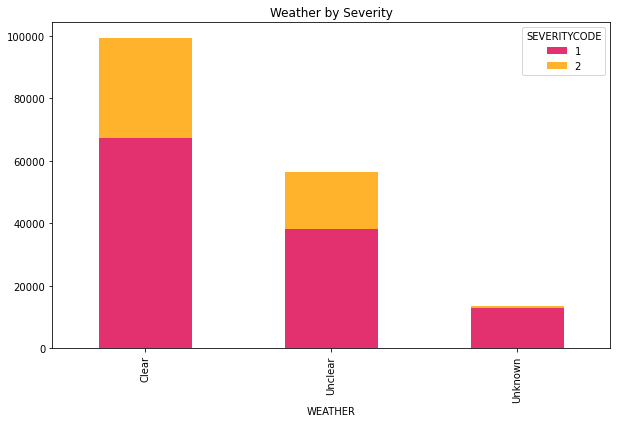

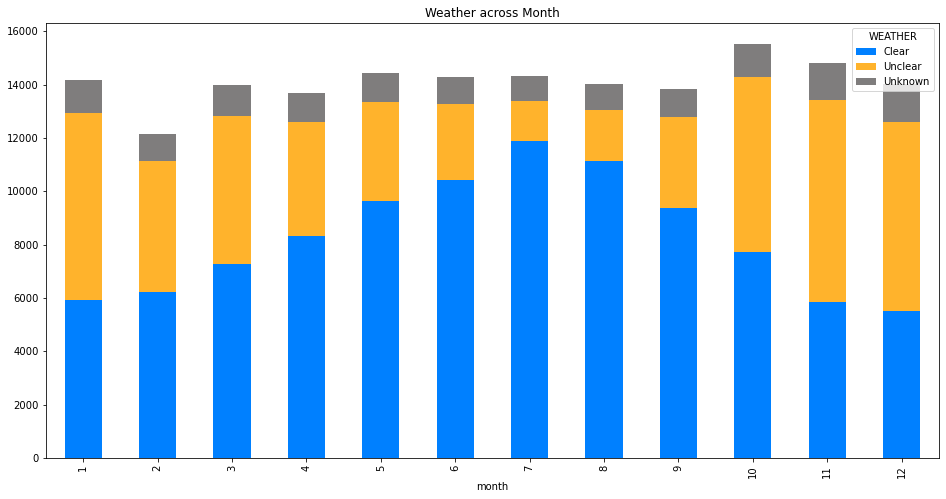

In [26]:
# Replace other and nulls with unknown
df["WEATHER"].replace(np.nan,'Unknown', inplace=True)
df["WEATHER"].replace('Other','Unknown', inplace=True)
print("WEATHER",df['WEATHER'].value_counts().to_frame('count'))
print("Unknown",df['WEATHER'].isna().sum())

# Let's classify weather in clear and not clear
df.loc[(df['WEATHER'] != 'Clear') & (df['WEATHER'] != 'Unknown'),'WEATHER'] = 'Unclear'
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c')    ,figsize=(10, 6)   )
plt.title("Weather by Severity");

# How is waether in Seatlle across the year
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d')    ,figsize=(16, 8)   )
plt.title("Weather across Month");

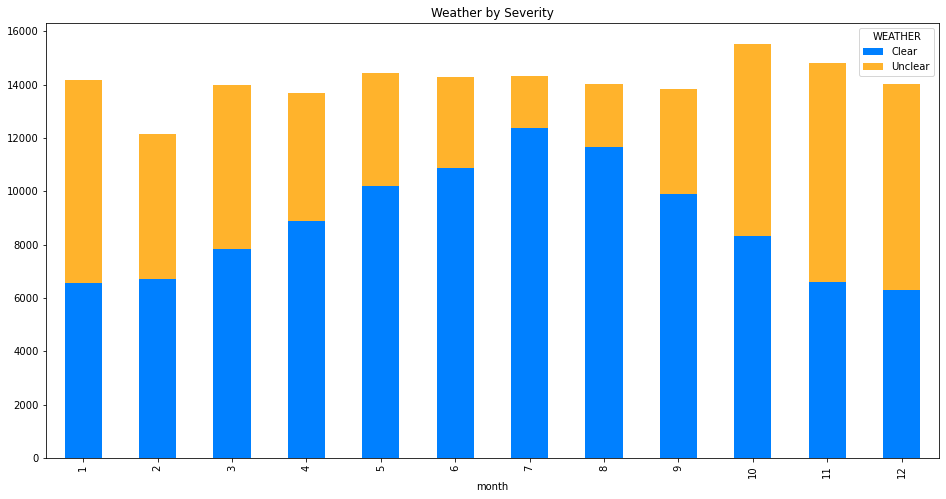

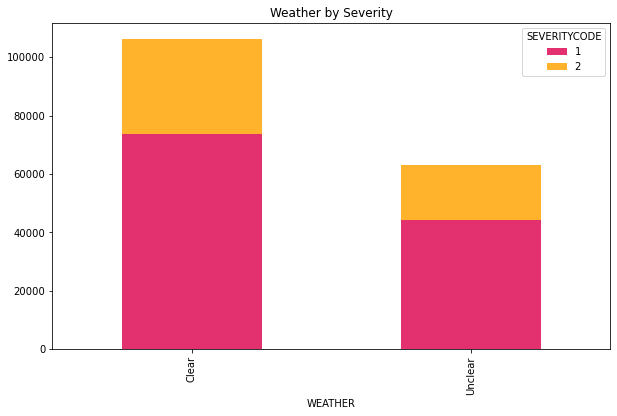

In [27]:
# Assuming that weather will be same on day across seattle. so replace the data where weather is unknown with the data where weather is not unknown and dates are matching 
df_notnull=df.loc[df['WEATHER']!='Unknown']
df_notnull = df_notnull[['INCDATE','WEATHER']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('INCDATE',inplace=True) 
s=df_notnull.to_dict()['WEATHER']
df.loc[df['WEATHER']=='Unknown','WEATHER']=df[('INCDATE')].map(s)
df = df[df["WEATHER"].notna()]
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d')    ,figsize=(16, 8)   )
plt.title("Weather by Severity");
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c')    ,figsize=(10, 6)   )
plt.title("Weather by Severity");

### Let's review road conditions

ROADCOND                  count
Dry             110988
Wet              43042
Unknown          13020
Ice               1112
Snow/Slush         899
Standing Water     103
Sand/Mud/Dirt       64
Oil                 57
Unknown 0


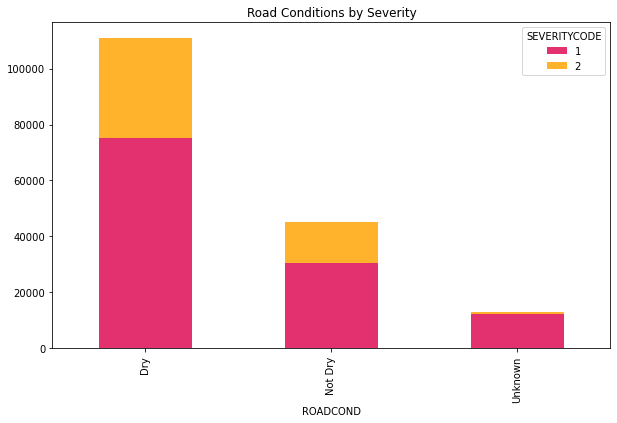

In [28]:
# Let's take a look at road conditions 
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
df["ROADCOND"].replace('Other','Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())

# Classify road condition as dry and not dry, there are lot of unknown
df.loc[(df['ROADCOND'] != 'Dry') & (df['ROADCOND'] != 'Unknown'),'ROADCOND'] = 'Not Dry'
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10, 6)   )
plt.title("Road Conditions by Severity");

#### Let's assume that on a particular day at a particular location road condition will be same. Let's fill unknowns using this logic

In [29]:
# Create a key with date and location
df["Key1"]=df['INCDATE'].astype(str)+df['LOCATION']

ROADCOND           count
Dry      111033
Not Dry   46307
Unknown   11945
Unknown 0


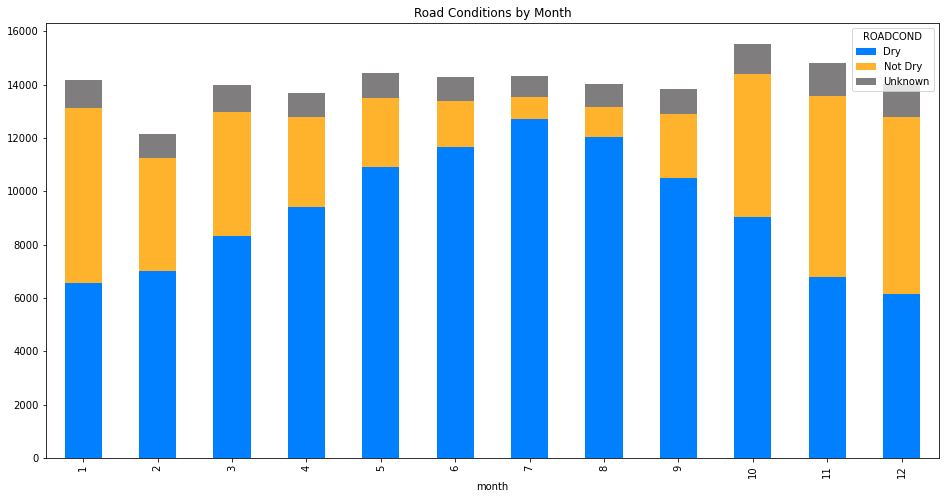

In [30]:
# Using the key's let's repalce unknown
df_notnull=df.loc[df['ROADCOND']!='Unknown']
df_notnull = df_notnull[['Key1','ROADCOND']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('Key1',inplace=True) 
s=df_notnull.to_dict()['ROADCOND']
df.loc[df['ROADCOND']=='Unknown','ROADCOND']=df[('Key1')].map(s)
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())

# Stil unknowns
df.pivot_table(index= ('month'), columns='ROADCOND', aggfunc='size').plot.bar(stacked=True, color = ('#0080ff','#ffb32c','#7f7d7d'), figsize=(16, 8)  )
plt.title("Road Conditions by Month");

#### As road conditions are dry and not dry, we can say that road in Seatlle are mostly dry during March to October. With this assumption let's remove the nulls/unknowns

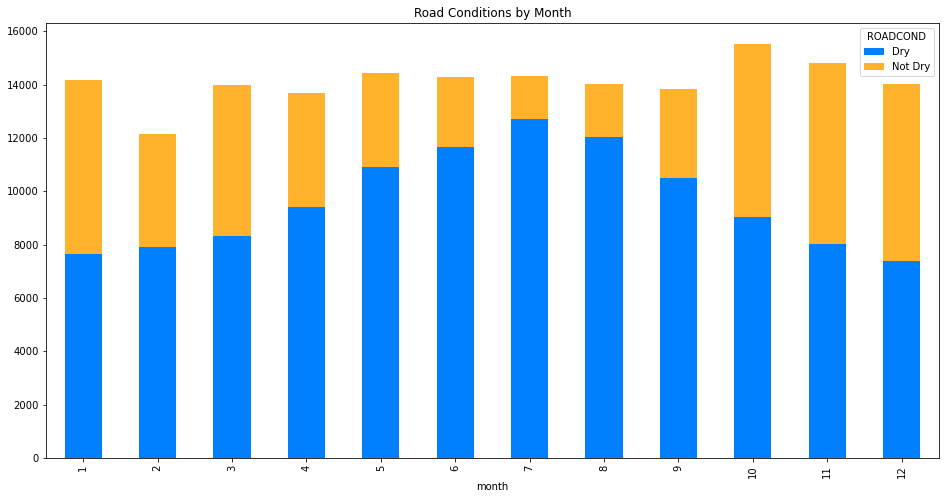

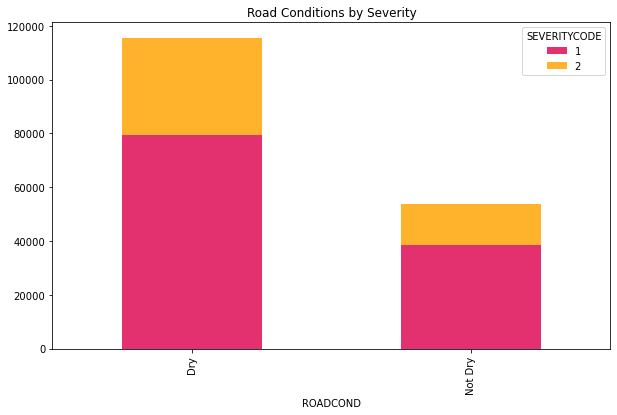

In [31]:
df.loc[df['month'].isin([1,2,11,12])&(df["ROADCOND"]=='Unknown'), 'ROADCOND'] = 'Dry'
df.loc[(df['month'] >= 3)&(df['month'] <= 10)&(df["ROADCOND"]=='Unknown') ,'ROADCOND'] = 'Not Dry'
df.pivot_table(index= ('month'),columns='ROADCOND', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d'), figsize=(16, 8)  )
plt.title("Road Conditions by Month");
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10, 6)   )
plt.title("Road Conditions by Severity");

### Let's review Collision Type

COLLISIONTYPE             count
Parked Car  42335
Angles      31100
Rear Ended  30277
Other       21085
Sideswipe   16637
Left Turn   12351
Pedestrian   6068
Cycles       4937
Right Turn   2626
Head On      1848
Unknown 21
[23 22 51 50 21 52 66 40 57 56 41 17 67 49 31 65 42 48 64 53 54 60 43 87
 85 88 18]


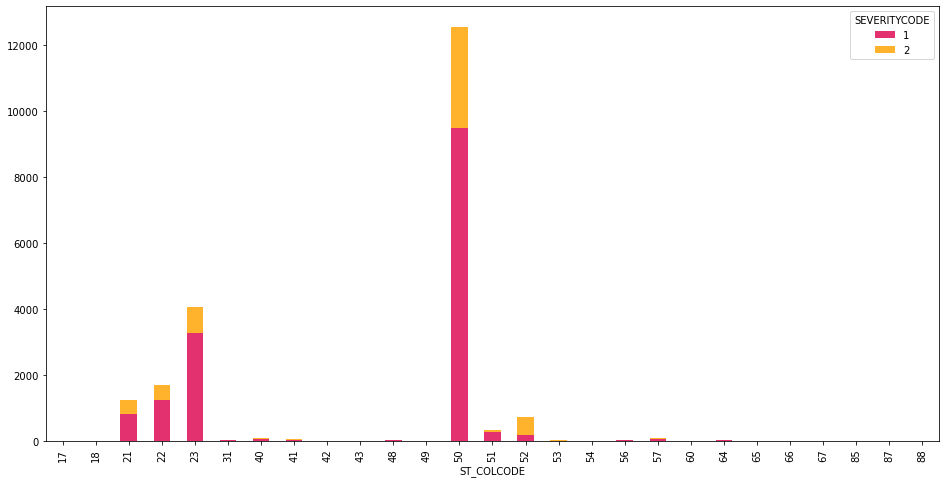

In [32]:
# There are lots of other data in collsion type, only 21 unknowns. Let's get rid of it
print("COLLISIONTYPE",df['COLLISIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['COLLISIONTYPE'].isna().sum())
df = df[df["COLLISIONTYPE"].notna()]

# Let's use ST_COLCODE to fill other value, first let's map the records where colllsion type as other with ST_COLCODE 
dfcollision = df[(df["COLLISIONTYPE"]=='Other')]
dfcollision=dfcollision[["ST_COLCODE","COLLISIONTYPE","SEVERITYCODE"]]
dfcollision.reset_index(inplace=True,drop = True)
dfcollision = dfcollision[dfcollision["ST_COLCODE"].notna()]
dfcollision = dfcollision[dfcollision["ST_COLCODE"] !=' ']
dfcollision[["ST_COLCODE"]] = dfcollision[['ST_COLCODE']].astype("int")
dfcollision.pivot_table(index= ('ST_COLCODE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(16, 8))
print(dfcollision["ST_COLCODE"].unique())

#### There are few colcodes which we can use, based on metadata we will now replace collsion type with correct values

(169264, 29)
(168788, 28)


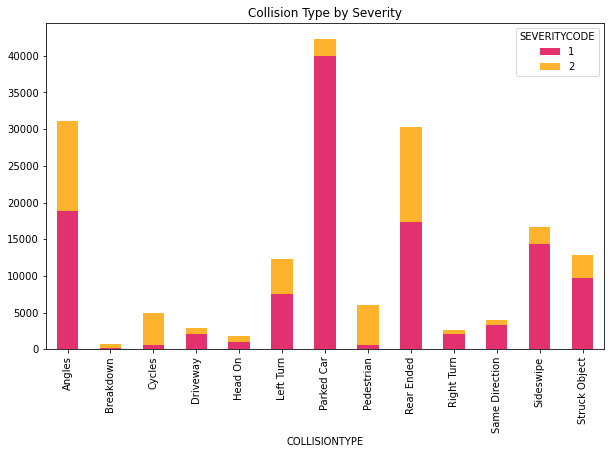

In [33]:
print(df.shape)
df = df[df["ST_COLCODE"].notna()]
df = df[df["ST_COLCODE"] !=' ']
df[["ST_COLCODE"]] = df[['ST_COLCODE']].astype("int")

# Dropping thise which are not in metadata or very less values
df = df[~df["ST_COLCODE"].isin([17,18,31,40,41,42,43,48,49,53,54,56,57,60,64,65,66,67,85,87,88])]

# Based in metadata  let's repalce collsion type
df.loc[df['ST_COLCODE'].isin([51,50]), 'COLLISIONTYPE'] = 'Struck Object'
df.loc[df['ST_COLCODE'].isin([21,22]), 'COLLISIONTYPE'] = 'Driveway'
df.loc[df['ST_COLCODE'].isin([52]), 'COLLISIONTYPE'] = 'Breakdown'
df.loc[df['ST_COLCODE'].isin([23]), 'COLLISIONTYPE'] = 'Same Direction'
df.drop(columns=[ 'ST_COLCODE'],axis=1,inplace=True)
print(df.shape)
df.pivot_table(index='COLLISIONTYPE', columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10,6)  )
plt.title("Collision Type by Severity");

### Let's review address

ADDRTYPE                count
Block         109581
Intersection   56961
Alley           2246
is null 0


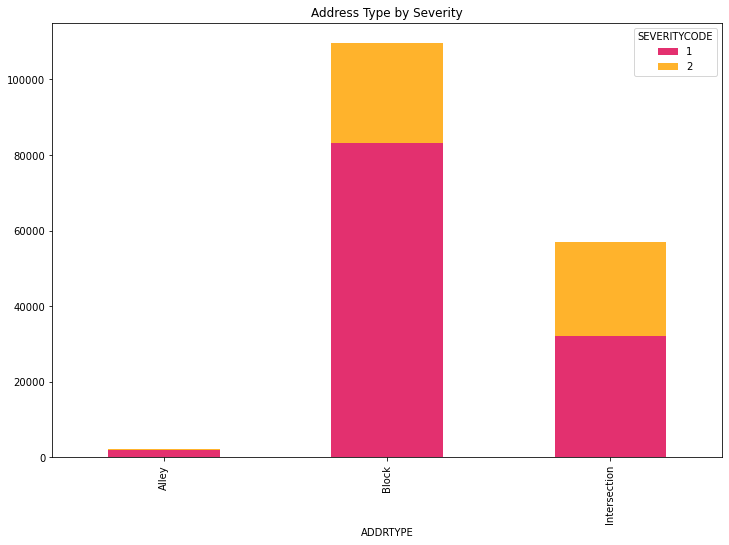

In [34]:
# Let's replace the null 
df["ADDRTYPE"].replace(np.nan,'Unknown', inplace=True)
df_notnull=df.loc[df['ADDRTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','ADDRTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 

# Let's use location to determine missing addresstype 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['ADDRTYPE']
df.loc[df['ADDRTYPE']=='Unknown','ADDRTYPE']=df[('LOCATION')].map(s)
print("ADDRTYPE",df['ADDRTYPE'].value_counts().to_frame('count'))
print("is null",df['ADDRTYPE'].isna().sum())
df.pivot_table(index= ('ADDRTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(12, 8))
plt.title("Address Type by Severity");

### Let's review Junction Type

JUNCTIONTYPE                                                    count
Mid-Block (not related to intersection)            77983
At Intersection (intersection related)             54891
Mid-Block (but intersection related)               19244
Driveway Junction                                   8939
Unknown                                             5655
At Intersection (but not related to intersection)   1920
Ramp Junction                                        156
Unknown 0


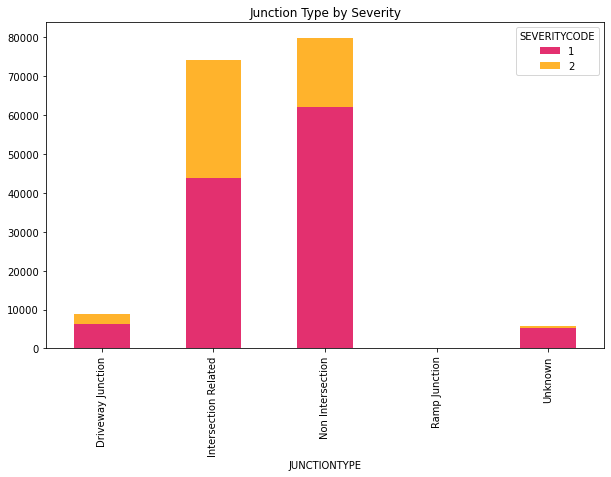

In [35]:
# Let's take a look at junction type
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['JUNCTIONTYPE'].isna().sum())

# Wwe can classify the below values to intersection related or not
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace({
   'Mid-Block (not related to intersection)':'Non Intersection' ,
   'At Intersection (intersection related)': 'Intersection Related',
   'Mid-Block (but intersection related)': 'Intersection Related',
   'At Intersection (but not related to intersection)':'Non Intersection',
    np.nan:'Unknown'
  })
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10, 6))
plt.title("Junction Type by Severity");

JUNCTIONTYPE                       count
Non Intersection      81540
Intersection Related  75215
Driveway Junction      9740
Ramp Junction          1998
is null 295


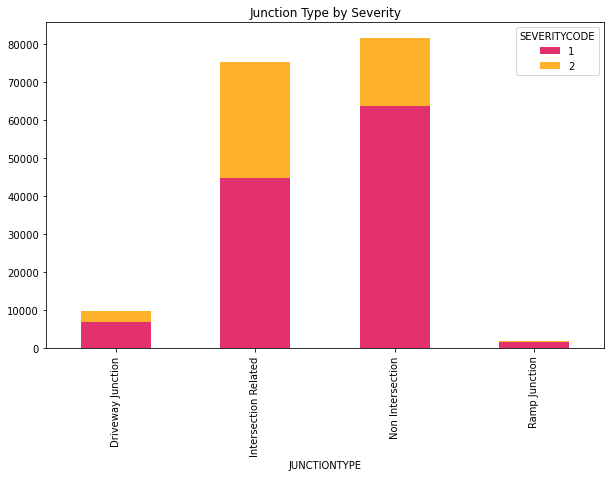

In [36]:
# Let's take care the unknowns, how about using location again? 
df_notnull=df.loc[df['JUNCTIONTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','JUNCTIONTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['JUNCTIONTYPE']
df.loc[df['JUNCTIONTYPE']=='Unknown','JUNCTIONTYPE']=df[('LOCATION')].map(s)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("is null",df['JUNCTIONTYPE'].isna().sum())
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)

# Works perfectly only 295 unknowns, lets delete these records
df = df[df["JUNCTIONTYPE"] != 'Unknown']
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10, 6))
plt.title("Junction Type by Severity");

#### During the Data phase - we explored the dataset and cleaned it up by replacing the missing and NaN values. We dropped the columns or attributes that is not helpful for our model. In week 2 of assignment we will continue to create machine learning model.

## Feature Determination

In [37]:
# is location a factor? let's map serverity codes for 7 months of data in 2016
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
accident_df=df.loc[(df['X'].notna()) & (df['year'] == 2016 ) &   (df['month'].isin([6,7,8,9,10,11,12]))]
               #& (df['year'].isin([2016,2017,2018,2019]) 
                 #   & (df['X'].notna())   )]
accident_df = accident_df[['X','Y','SEVERITYCODE','year']] 
accident_df['SEVERITYCODE'] = accident_df['SEVERITYCODE'].astype(str) 
print(accident_df.shape)
incidents = folium.map.FeatureGroup()
for lat, lng, label in zip(accident_df.Y, accident_df.X, accident_df.SEVERITYCODE):
    if label == '1':
        folium.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='blue'#,
         ).add_to(seattle_map)
    else:
        folium.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='red'#,
         ).add_to(seattle_map)

# show map
seattle_map

(6194, 4)


In [38]:
# let's drop the location. from the visualtion it is evident that at a loction both types of accidents may occure. we shall not use X & Y as features
df.drop(['LOCATION'],axis=1,inplace=True)
df=df.loc[(df['X'].notna())]

<AxesSubplot:>

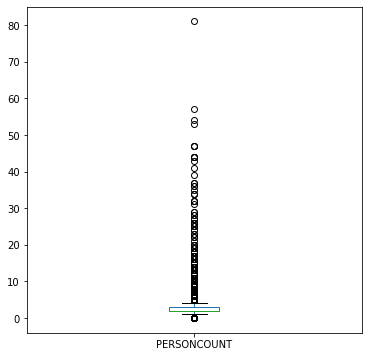

In [39]:
# how about person count, in summary above there are lots of unque values
df['PERSONCOUNT'].plot(kind='box', figsize=(6, 6))

SEVERITYCODE             1      2
PERSONCOUNT-binned               
Low                 113640  50272
Medium                  23      5
High                     1      1

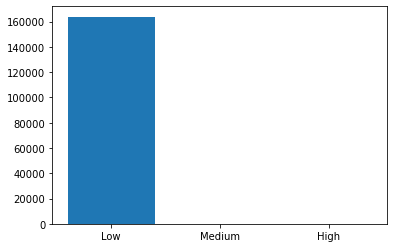

In [40]:
#there are lots of outliers, let's bin it and visualize
bins = np.linspace(min(df["PERSONCOUNT"]), max(df["PERSONCOUNT"]), 4)
group_names = ['Low', 'Medium', 'High']
df['PERSONCOUNT-binned'] = pd.cut(df['PERSONCOUNT'], bins, labels=group_names, include_lowest=True )
plt.bar(group_names, df["PERSONCOUNT-binned"].value_counts())
pd.crosstab(df['PERSONCOUNT-binned'],df['SEVERITYCODE'])

In [41]:
#as the binning showed that most of the data is lowest bin and can't be used to detemrine severity (from the crosstab results)
df.drop(['PERSONCOUNT','PERSONCOUNT-binned'],axis=1,inplace=True)

In [42]:
#let's take a loot a pedcount, many accident's don't invlove pedesterians, but even if 1 pedest is invloved the risk of higher severity increases
pd.crosstab(df['PEDCOUNT'],df['SEVERITYCODE'])

SEVERITYCODE       1      2
PEDCOUNT                   
0             113025  44594
1                623   5463
2                 15    196
3                  1     19
4                  0      4
5                  0      1
6                  0      1

In [43]:
#used for P values & Avonova
from scipy import stats

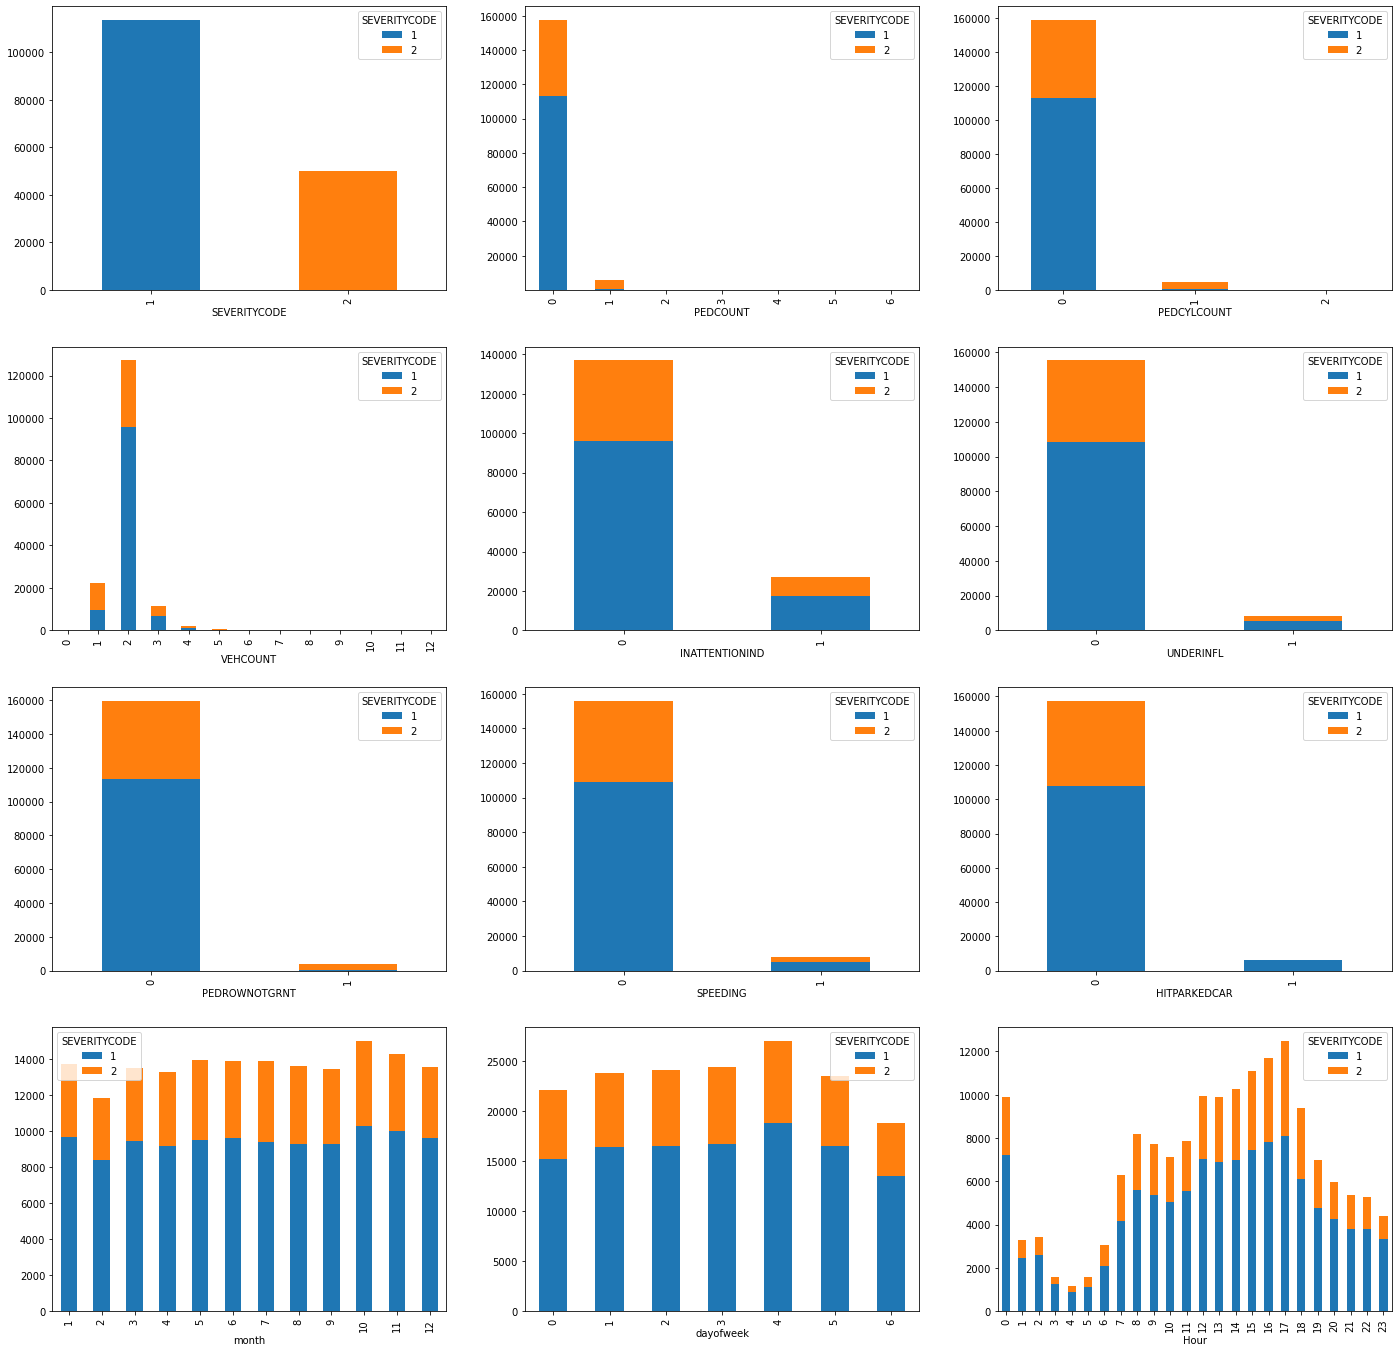

In [44]:
# let's visualize all numerical feature, we will drop year, dat , object id and lat long
numerical_features = df.select_dtypes(include=["number"])
numerical_features.drop(columns=[ 'X', 'Y', 'OBJECTID','year','day'],inplace=True)
plotbyInt_values(numerical_features)

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: Total positive linear correlation. 
- 0: No linear correlation, the two variables most likely do not affect each other. 
- -1: Total negative linear correlation.

P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the:

- p-value is < 0.001: we say there is strong evidence that the correlation is significant.
- p-value is < 0.05: there is moderate evidence that the correlation is significant.
- p-value is < 0.1: there is weak evidence that the correlation is significant.
- p-value is > 0.1: there is no evidence that the correlation is significant.

In [45]:
#let's calulate P values for the numerical features
col_name = numerical_features.columns
#['VEHCOUNT', 'INATTENTIONIND','UNDERINFL','SPEEDING', 'HITPARKEDCAR', 'month','dayofweek','PERSONCOUNT']
percof_smry = pd.DataFrame({'Column Name': [], 'Pearson Correlation Coefficient': [], 'P-value of': []})
for i in range (0,len(col_name)):
    pearson_coef, p_value = stats.pearsonr(df[col_name[i]], df['SEVERITYCODE'])
    percof_smry = percof_smry.append({"Column Name":col_name[i],"Pearson Correlation Coefficient": pearson_coef , "P-value of": p_value }, ignore_index=True)
print(percof_smry)

       Column Name  Pearson Correlation Coefficient     P-value of
0     SEVERITYCODE                              NaN            NaN
1         PEDCOUNT                         0.251263   0.000000e+00
2      PEDCYLCOUNT                         0.217310   0.000000e+00
3         VEHCOUNT                        -0.088294  5.464418e-281
4   INATTENTIONIND                         0.040824   2.016460e-61
5        UNDERINFL                         0.043036   4.618621e-68
6    PEDROWNOTGRNT                         0.208156   0.000000e+00
7         SPEEDING                         0.038203   5.226122e-54
8     HITPARKEDCAR                        -0.106021   0.000000e+00
9            month                         0.004751   5.437663e-02
10       dayofweek                        -0.017850   4.910711e-13
11            Hour                         0.024883   7.009487e-24


## Categorical Features

Index(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')


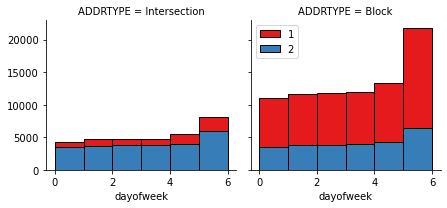

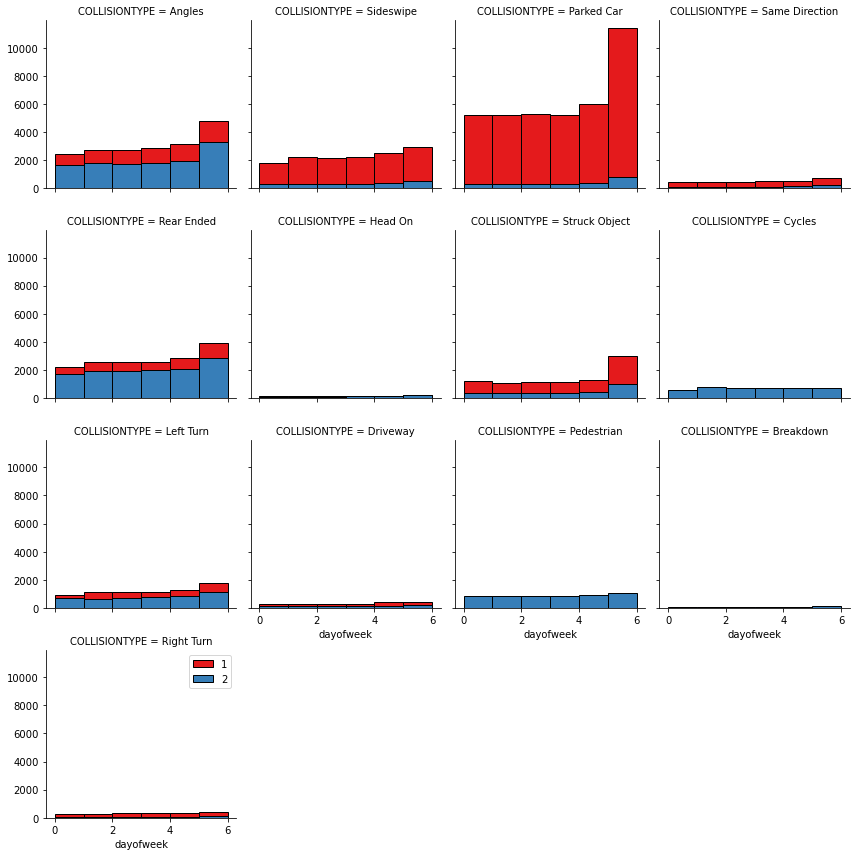

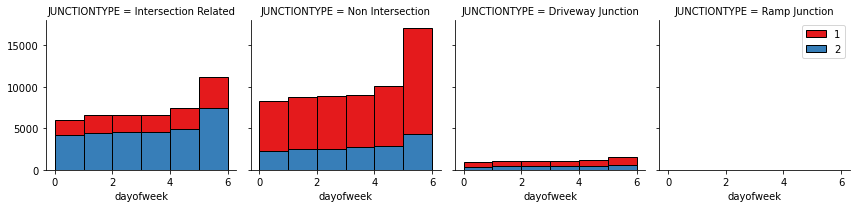

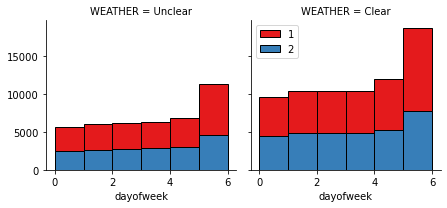

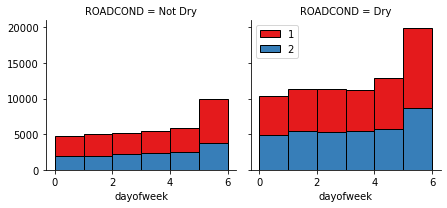

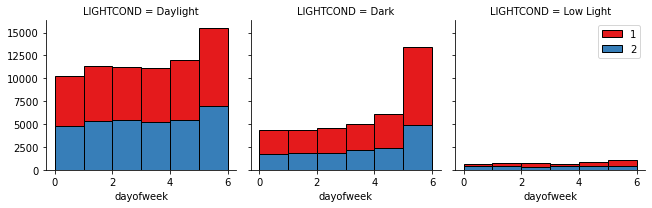

In [46]:
#let's select all object type data and visualize them across the week
categorical_features = df.select_dtypes(exclude = [np.number, np.datetime64])#.columns.tolist()
categorical_features.drop(columns=[ 'INCDATE', 'INCDTTM', 'Key1'],inplace=True)
char_value=(categorical_features.columns)
print(char_value)
plotbycharvalues(char_value)

### ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

Large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. expect ANOVA to return a sizeable F-test score and a small p-value.

Let's calculate avonva score for all categorical features.

In [47]:
ANOVA_smry = pd.DataFrame({'Column Name': [], 'F Value': [], 'P value': []})
grouped_test=df[['LIGHTCOND', 'SEVERITYCODE']].groupby(['LIGHTCOND'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Daylight')['SEVERITYCODE']
                             ,grouped_test.get_group('Dark')['SEVERITYCODE']
                             ,grouped_test.get_group('Low Light')['SEVERITYCODE']
                            # ,grouped_test.get_group('Unknown')['SEVERITYCODE'] 
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"LIGHTCOND","F Value": f_val , "P value": p_val }, ignore_index=True)

In [48]:
grouped_test=df[['ADDRTYPE', 'SEVERITYCODE']].groupby(['ADDRTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Intersection')['SEVERITYCODE']
                             ,grouped_test.get_group('Block')['SEVERITYCODE']
                                          )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"ADDRTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)

In [49]:
grouped_test=df[['COLLISIONTYPE', 'SEVERITYCODE']].groupby(['COLLISIONTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Angles')['SEVERITYCODE']
                              ,grouped_test.get_group('Sideswipe')['SEVERITYCODE']
                              ,grouped_test.get_group('Parked Car')['SEVERITYCODE']
                              ,grouped_test.get_group('Rear Ended')['SEVERITYCODE']
                              ,grouped_test.get_group('Head On')['SEVERITYCODE']
                              ,grouped_test.get_group('Left Turn')['SEVERITYCODE']
                              ,grouped_test.get_group('Right Turn')['SEVERITYCODE']
                              ,grouped_test.get_group('Cycles')['SEVERITYCODE']
                              ,grouped_test.get_group('Driveway')['SEVERITYCODE']
                              ,grouped_test.get_group('Pedestrian')['SEVERITYCODE']   
                              ,grouped_test.get_group('Breakdown')['SEVERITYCODE']
                              ,grouped_test.get_group('Same Direction')['SEVERITYCODE'] 
                              ,grouped_test.get_group('Struck Object')['SEVERITYCODE']
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"COLLISIONTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)

In [50]:
grouped_test=df[['JUNCTIONTYPE', 'SEVERITYCODE']].groupby(['JUNCTIONTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Non Intersection')['SEVERITYCODE']
                             ,grouped_test.get_group('Intersection Related')['SEVERITYCODE']
                             ,grouped_test.get_group('Ramp Junction')['SEVERITYCODE']
                             ,grouped_test.get_group('Driveway Junction')['SEVERITYCODE']
                                         )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"JUNCTIONTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)

In [51]:
grouped_test=df[['WEATHER', 'SEVERITYCODE']].groupby(['WEATHER'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Clear')['SEVERITYCODE']
                             ,grouped_test.get_group('Unclear')['SEVERITYCODE']
                            )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"WEATHER","F Value": f_val , "P value": p_val }, ignore_index=True)

In [52]:
grouped_test=df[['ROADCOND', 'SEVERITYCODE']].groupby(['ROADCOND'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Dry')['SEVERITYCODE']
                             ,grouped_test.get_group('Not Dry')['SEVERITYCODE']
                             #,grouped_test.get_group('Unknown')['SEVERITYCODE']
                        
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"ROADCOND","F Value": f_val , "P value": p_val }, ignore_index=True)

In [53]:
ANOVA_smry

Column Name      F Value       P value
0      LIGHTCOND   113.296989  6.756411e-50
1       ADDRTYPE  6929.297391  0.000000e+00
2  COLLISIONTYPE  3892.866144  0.000000e+00
3   JUNCTIONTYPE  2216.275852  0.000000e+00
4        WEATHER    14.132951  1.703928e-04
5       ROADCOND   119.806061  7.132669e-28

In [54]:
#based on p values using pearce coefficient and avanova let's drop the below colums

df.drop(columns=[ 'OBJECTID','year','day','WEATHER','PEDCOUNT','PEDCYLCOUNT','PEDROWNOTGRNT','HITPARKEDCAR','month','INCDATE', 'INCDTTM','LIGHTCOND','ROADCOND'],axis=1,inplace=True)

In [55]:
df.drop(columns=[ 'X', 'Y'],axis=1,inplace=True)
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'dayofweek', 'Hour', 'Key1'],
      dtype='object')

In [56]:
#feature selection and co relation
Feature=df[['SEVERITYCODE','ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'SPEEDING','dayofweek', 'Hour']]

In [57]:
from sklearn import preprocessing
# use encoding to convert cateorical values.
le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Non Intersection','Intersection Related','Driveway Junction','Ramp Junction'])
Feature["JUNCTIONTYPE"] = le_lc.transform(Feature["JUNCTIONTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Block','Intersection'])
Feature["ADDRTYPE"] = le_lc.transform(Feature["ADDRTYPE"]) 
le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Angles', 'Sideswipe', 'Parked Car', 'Same Direction',
       'Rear Ended', 'Head On', 'Struck Object', 'Cycles', 'Left Turn',
       'Driveway', 'Pedestrian', 'Breakdown', 'Right Turn'])
Feature["COLLISIONTYPE"] = le_lc.transform(Feature["COLLISIONTYPE"])

In [58]:
print(Feature.columns)

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'dayofweek', 'Hour'],
      dtype='object')


In [59]:
Feature.corr()

SEVERITYCODE  ADDRTYPE  COLLISIONTYPE  VEHCOUNT  JUNCTIONTYPE  \
SEVERITYCODE        1.000000  0.201378      -0.144644 -0.088294     -0.151800   
ADDRTYPE            0.201378  1.000000      -0.450280 -0.098554     -0.472011   
COLLISIONTYPE      -0.144644 -0.450280       1.000000 -0.126049      0.362889   
VEHCOUNT           -0.088294 -0.098554      -0.126049  1.000000      0.068466   
JUNCTIONTYPE       -0.151800 -0.472011       0.362889  0.068466      1.000000   
INATTENTIONIND      0.040824 -0.078845       0.081148  0.046350      0.035770   
UNDERINFL           0.043036 -0.046195       0.077171 -0.007506      0.055864   
SPEEDING            0.038203 -0.057170       0.105463 -0.043290      0.044674   
dayofweek          -0.017850 -0.012360       0.004209  0.006383      0.025505   
Hour                0.024883  0.032019      -0.047342  0.022475     -0.030968   

                INATTENTIONIND  UNDERINFL  SPEEDING  dayofweek      Hour  
SEVERITYCODE          0.040824   0.043036  0.038203  -0.017850  0.024883  
ADDRTYPE             -0.078845  -0.046195 -0.057170  -0.012360  0.032019  
COLLISIONTYPE         0.081148   0.077171  0.105463   0.004209 -0.047342  
VEHCOUNT              0.046350  -0.007506 -0.043290   0.006383  0.022475  
JUNCTIONTYPE          0.035770   0.055864  0.044674   0.025505 -0.030968  
INATTENTIONIND        1.000000  -0.033525 -0.051442  -0.018997  0.005172  
UNDERINFL            -0.033525   1.000000  0.093310   0.077957 -0.072547  
SPEEDING             -0.051442   0.093310  1.000000   0.029907 -0.051785  
dayofweek            -0.018997   0.077957  0.029907   1.000000 -0.044548  
Hour                  0.005172  -0.072547 -0.051785  -0.044548  1.000000

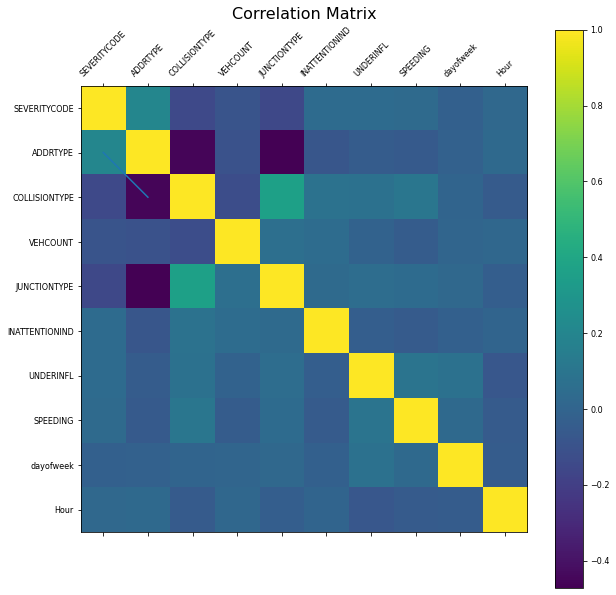

In [60]:
#let's visualize the correaltions
f = plt.figure(figsize=(10, 10))
plt.matshow(Feature.corr(), fignum=f.number)
plt.xticks(range(Feature.shape[1]), Feature.columns, fontsize=8, rotation=45)
plt.yticks(range(Feature.shape[1]), Feature.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=16);
plt.plot([1,2])
f.savefig('test.png', bbox_inches='tight')

In [61]:
Feature.drop(columns=[ 'SEVERITYCODE'],axis=1,inplace=True)
X = Feature.values
X[0:5]

array([[ 1,  0,  2,  1,  0,  0,  0,  2, 14],
       [ 0, 11,  2,  2,  0,  0,  0,  2, 18],
       [ 0,  6,  3,  2,  0,  0,  0,  3, 10],
       [ 0, 10,  3,  2,  0,  0,  0,  4,  9],
       [ 1,  0,  2,  1,  0,  0,  0,  2,  8]], dtype=int64)

In [62]:
# let' set out independent variable 
Y = df['SEVERITYCODE'].values
print(Y[0:5])
type(Y)

[2 1 1 1 2]


numpy.ndarray

In [63]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.37609549, -1.61543555,  0.05066432, -0.70835155, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378,  0.20461975],
       [-0.72669375,  1.32653435,  0.05066432,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378,  0.86249285],
       [-0.72669375, -0.0107247 ,  1.82925322,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012,  0.02378129, -0.45325334],
       [-0.72669375,  1.05908254,  1.82925322,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012,  0.54264636, -0.61772162],
       [ 1.37609549, -1.61543555,  0.05066432, -0.70835155, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378, -0.78218989]])

### Model Selection

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (122956, 9) (122956,)
Test set: (40986, 9) (40986,)


### K NN

In [65]:
#find the best K
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KSEVERITY = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=KSEVERITY.predict(X_test)
   
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

print("mean accuracy is for differnt k is ", mean_acc)

mean accuracy is for differnt k is  [0.68135461 0.71883082 0.70738789 0.73063973 0.71873323 0.73427512
 0.72312497 0.73493388 0.72878544 0.7380569  0.73200605 0.73895964
 0.73303079 0.74113112]


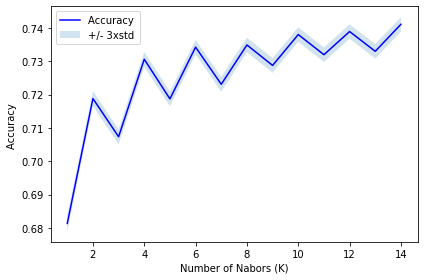

In [66]:
#plot accuracy to find the best K
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.20)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [67]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7411311179427121 with k= 14


In [68]:
#implement the model with best value of K which is 14
k = 14
#Train Model and Predict  
KSEVERITY = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
print(KSEVERITY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')


### Logistic Regression

In [69]:
# will create the logistic regression first
from sklearn.linear_model import LogisticRegression

SEVERITYLR = LogisticRegression(C=0.01, solver="newton-cg").fit(X_train,Y_train)
yhat = SEVERITYLR.predict(X_test)
print(yhat [0:5])
yhat_prob = SEVERITYLR.predict_proba(X_test)
print(yhat_prob [0:5])

[1 1 1 1 1]
[[0.77740932 0.22259068]
 [0.66488274 0.33511726]
 [0.69491518 0.30508482]
 [0.80103424 0.19896576]
 [0.62845545 0.37154455]]


### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

SEVERITYTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
SEVERITYTree.fit(X_train,Y_train)
predTree = SEVERITYTree.predict(X_test)
print (predTree)

[1 1 2 ... 2 1 1]


In [71]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.7546479285609721


In [72]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus
import matplotlib.image as mpimg
from sklearn.externals.six import StringIO
from sklearn import tree

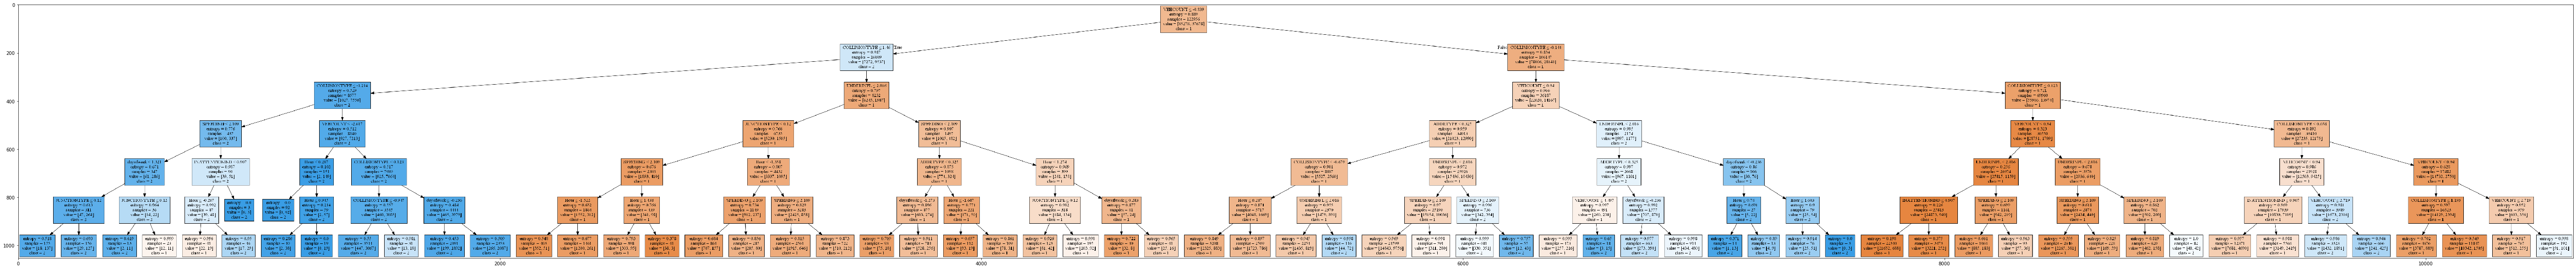

In [74]:
dot_data = StringIO()
filename = "Sevrtree.png"
featureNames = Feature.columns
targetNames = Y
out=tree.export_graphviz(SEVERITYTree,feature_names=featureNames, out_file=dot_data,  class_names= np.unique(Y_train).astype(str)
                         ,filled=True
                         ,special_characters=True
                         ,rotate=False
                        )  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,120))
plt.imshow(img,interpolation='nearest')

### SVM

In [75]:
from sklearn import svm

In [76]:
SEVERITYSVM = svm.SVC(kernel='sigmoid')
SEVERITYSVM.fit(X_train, Y_train) 
yhat = SEVERITYSVM.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Model Evaluation

In [77]:
#fetch random records from cleaned dataset.
df_Test=df.sample(frac=0.25)

In [78]:
#apply encoding

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Non Intersection','Intersection Related','Driveway Junction','Ramp Junction'])
df_Test["JUNCTIONTYPE"] = le_lc.transform(df_Test["JUNCTIONTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Block','Intersection'])
df_Test["ADDRTYPE"] = le_lc.transform(df_Test["ADDRTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Angles', 'Sideswipe', 'Parked Car', 'Same Direction',
       'Rear Ended', 'Head On', 'Struck Object', 'Cycles', 'Left Turn',
       'Driveway', 'Pedestrian', 'Breakdown', 'Right Turn'])
df_Test["COLLISIONTYPE"] = le_lc.transform(df_Test["COLLISIONTYPE"])

In [79]:
X_Eval=df_Test[['ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND','UNDERINFL', 'SPEEDING','dayofweek', 'Hour']].values

In [80]:
X_Eval = preprocessing.StandardScaler().fit(X_Eval).transform(X_Eval)
print(X_Eval[0:5])

[[ 1.37418052 -1.62003907  1.83952769 -0.71373834 -0.44115038 -0.23546239
  -0.22199525  0.53748274  0.36945878]
 [-0.72770643  0.52391047  0.05067245 -0.71373834 -0.44115038 -0.23546239
   4.50460082  1.57286298  0.20478614]
 [ 1.37418052  1.32789156  0.05067245 -0.71373834 -0.44115038 -0.23546239
  -0.22199525 -1.01558762 -1.11259501]
 [ 1.37418052 -1.62003907  0.05067245 -0.71373834 -0.44115038 -0.23546239
  -0.22199525  1.57286298 -1.4419403 ]
 [-0.72770643  1.05989786  0.05067245  0.94639898  2.26680072 -0.23546239
  -0.22199525 -0.4978975  -0.61857708]]


In [81]:
Y_Eval = df_Test['SEVERITYCODE'].values
print(Y_Eval[0:5])

[2 2 1 1 1]


In [82]:
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### Let's calculate Jaccard index, f1 score and logloss for all models

In [83]:
KSEVERITY_yhat = KSEVERITY.predict(X_Eval)
KSEVERITY_yhat_prob = KSEVERITY.predict_proba(X_Eval)

print("KNN Jaccard index: %.3f" % jaccard_similarity_score(Y_Eval, KSEVERITY_yhat))
print("KNN F1-score: %.3f" % f1_score(Y_Eval, KSEVERITY_yhat, average='weighted') )
print("KNN LogLoss: %.3f" % log_loss(Y_Eval, KSEVERITY_yhat_prob))

KNN Jaccard index: 0.751
KNN F1-score: 0.722
KNN LogLoss: 0.651


In [84]:
SEVERITYTree_yhat = SEVERITYTree.predict(X_Eval)
SEVERITYTree_yhat_prob = SEVERITYTree.predict_proba(X_Eval)
print("DT Jaccard index: %.3f" % jaccard_similarity_score(Y_Eval, SEVERITYTree_yhat))
print("DT F1-score: %.3f" % f1_score(Y_Eval, SEVERITYTree_yhat, average='weighted') )
print("DT LogLoss: %.3f" % log_loss(Y_Eval, SEVERITYTree_yhat_prob))

DT Jaccard index: 0.754
DT F1-score: 0.716
DT LogLoss: 0.486


In [85]:
SEVERITYLR_yhat = SEVERITYLR.predict(X_Eval)
SEVERITYLR_yhat_prob = SEVERITYLR.predict_proba(X_Eval)
print("LR Jaccard index: %.3f" % jaccard_similarity_score(Y_Eval, SEVERITYLR_yhat))
print("LR F1-score: %.3f" % f1_score(Y_Eval, SEVERITYLR_yhat, average='weighted') )
print("LR LogLoss: %.3f" % log_loss(Y_Eval, SEVERITYLR_yhat_prob))

LR Jaccard index: 0.705
LR F1-score: 0.625
LR LogLoss: 0.584


In [86]:
SEVERITYSVM_yhat = SEVERITYSVM.predict(X_Eval)
print("SVM Jaccard index: %.3f" % jaccard_similarity_score(Y_Eval, SEVERITYSVM_yhat))
print("SVM F1-score: %.3f" % f1_score(Y_Eval, SEVERITYSVM_yhat, average='weighted') )

SVM Jaccard index: 0.601
SVM F1-score: 0.601


#### Let's visualize the models using confusion matrix and classification report

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.76      0.93      0.84     28368
           2       0.69      0.35      0.46     12618

   micro avg       0.75      0.75      0.75     40986
   macro avg       0.73      0.64      0.65     40986
weighted avg       0.74      0.75      0.72     40986

Normalized confusion matrix
[[0.93 0.07]
 [0.65 0.35]]


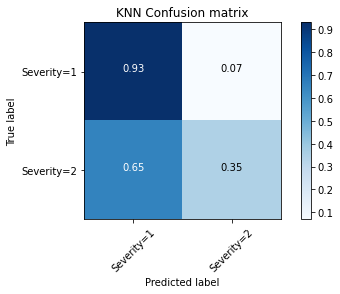

In [88]:
#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, KSEVERITY_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, KSEVERITY_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='KNN Confusion matrix')

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     28368
           2       0.74      0.30      0.43     12618

   micro avg       0.75      0.75      0.75     40986
   macro avg       0.75      0.63      0.64     40986
weighted avg       0.75      0.75      0.72     40986

Normalized confusion matrix
[[0.95 0.05]
 [0.7  0.3 ]]


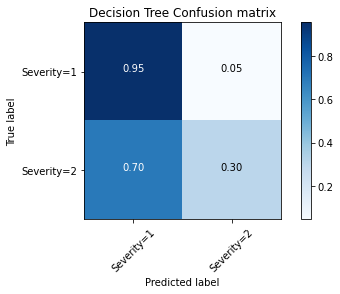

In [89]:
#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYTree_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYTree_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='Decision Tree Confusion matrix')

              precision    recall  f1-score   support

           1       0.71      0.97      0.82     28368
           2       0.61      0.11      0.19     12618

   micro avg       0.70      0.70      0.70     40986
   macro avg       0.66      0.54      0.50     40986
weighted avg       0.68      0.70      0.62     40986

Normalized confusion matrix
[[0.97 0.03]
 [0.89 0.11]]


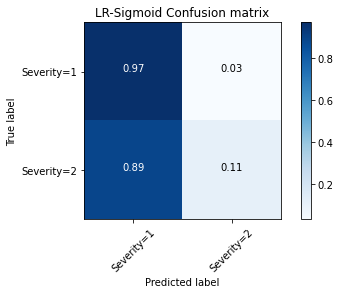

In [90]:
#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYLR_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYLR_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='LR-Sigmoid Confusion matrix')

              precision    recall  f1-score   support

           1       0.71      0.71      0.71     28368
           2       0.35      0.35      0.35     12618

   micro avg       0.60      0.60      0.60     40986
   macro avg       0.53      0.53      0.53     40986
weighted avg       0.60      0.60      0.60     40986

Normalized confusion matrix
[[0.71 0.29]
 [0.65 0.35]]


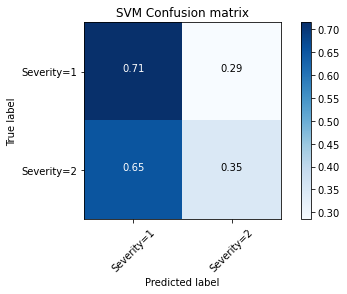

In [91]:
#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYSVM_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYSVM_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True, title='SVM Confusion matrix')

## Based on the performance and confusion matrix we can conclude KNN is the best fit.